# Autoencoder

As for the hidden layer, we choose the size of 1000, so that we can compare with SVD to compare these two which demensional reduction technique. 

* Data Preprocessing: we preprocess the data using Image from PIL to do the resizing and gray scale converting. we resize each image as 100-by-100 gray scale, and only read first 1000 images in each category due to computer memory limitation problem. 

* Implementation: we use the code from https://triangleinequality.wordpress.com/2014/08/12/theano-autoencoders-and-mnist/ to construct my autoencoder. We iterate 10 times with minibatch size 100. 

* Then for the KNN classification, we use the api from scikit-learn. For Euclidean-based KNN, we just set the metric paramter as 'euclidean', and for Pearson-based KNN, we define a 'pearson' distance function as '1 - scipy.pearsonr(x, y)[0]' because the higher the pearson coefficient is the closer the 'distance' is. The following is the performance. 

* Performance

    * When using Euclidean distance
$$accuracy = \frac{Tr(cm)}{\sum\sum{cm}} = 0.5068$$

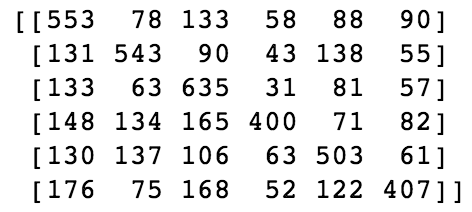

In [10]:
from IPython.display import Image
# Confusion Matrix
Image(filename='embed_pictures/auto-eu.PNG', width=250)

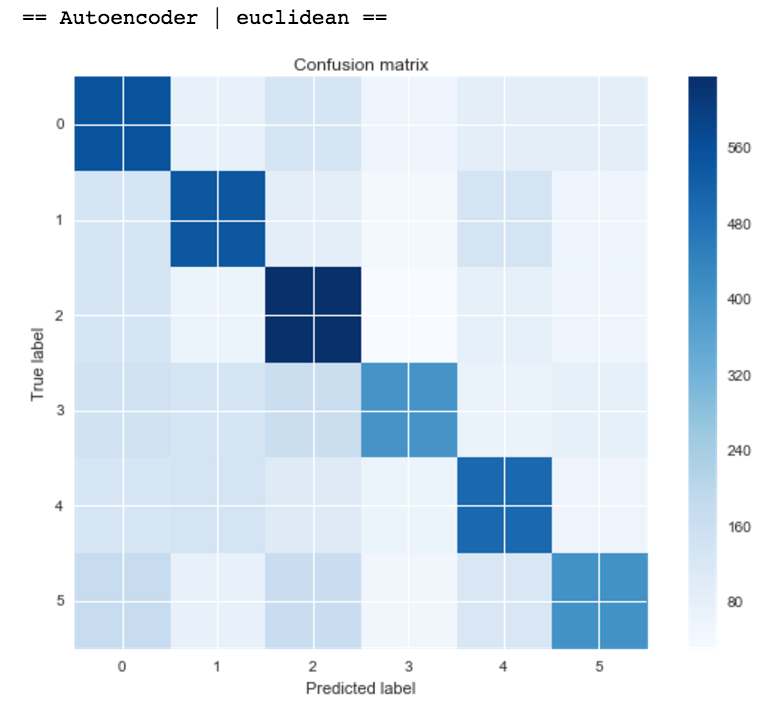

In [11]:
# Visualize Confusion Matrix
Image(filename='embed_pictures/vis-auto-eu.PNG', width=250)

    * When using Pearson coef
$$accuracy = \frac{Tr(cm)}{\sum\sum{cm}} = 0.5150$$

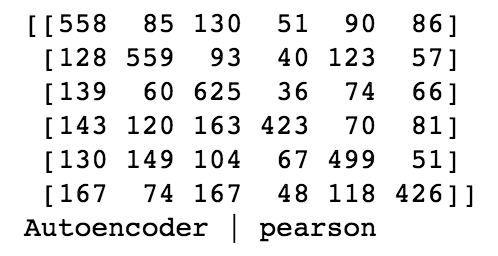

In [20]:
# Confusion Matrix
Image(filename='embed_pictures/auto-pearson.PNG', width=250)

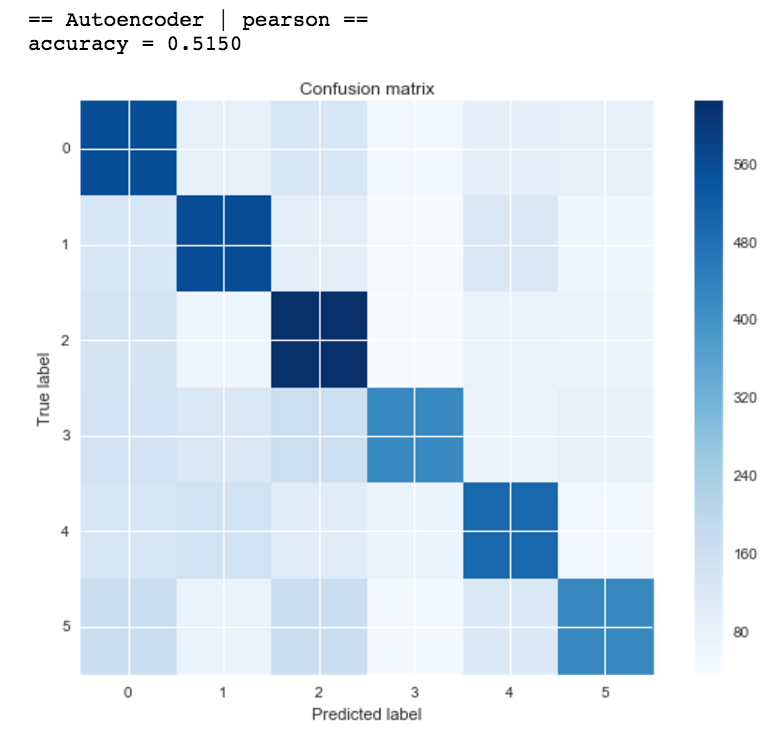

In [21]:
# Visualize Confusion Matrix
Image(filename='embed_pictures/vis-auto-pe.PNG', width=250)

* Conclusion: We can see that accuracy wise there is no much difference between Euclidean distance and Pearson Coefficient as a metric for KNN to use. However, runtime wise we find that there is huge difference. Euclidean-base KNN is much faster than Pearson-based KNN, so in general, we can conclude that the former is better. 

# SVD
To use same reduced dimension as autoencoder, I use first 1000 eigenvalues to reconstruct the approximation as a demensional reduction method. It is actually a nice choice as you can see from the plot of the singular values. Noice $\frac{\sigma_{i}}{\sigma_{1}}$, i > 1000, are fairly small so that we can truncate at 1000 to do the lower rank approximation of the original matrix. 

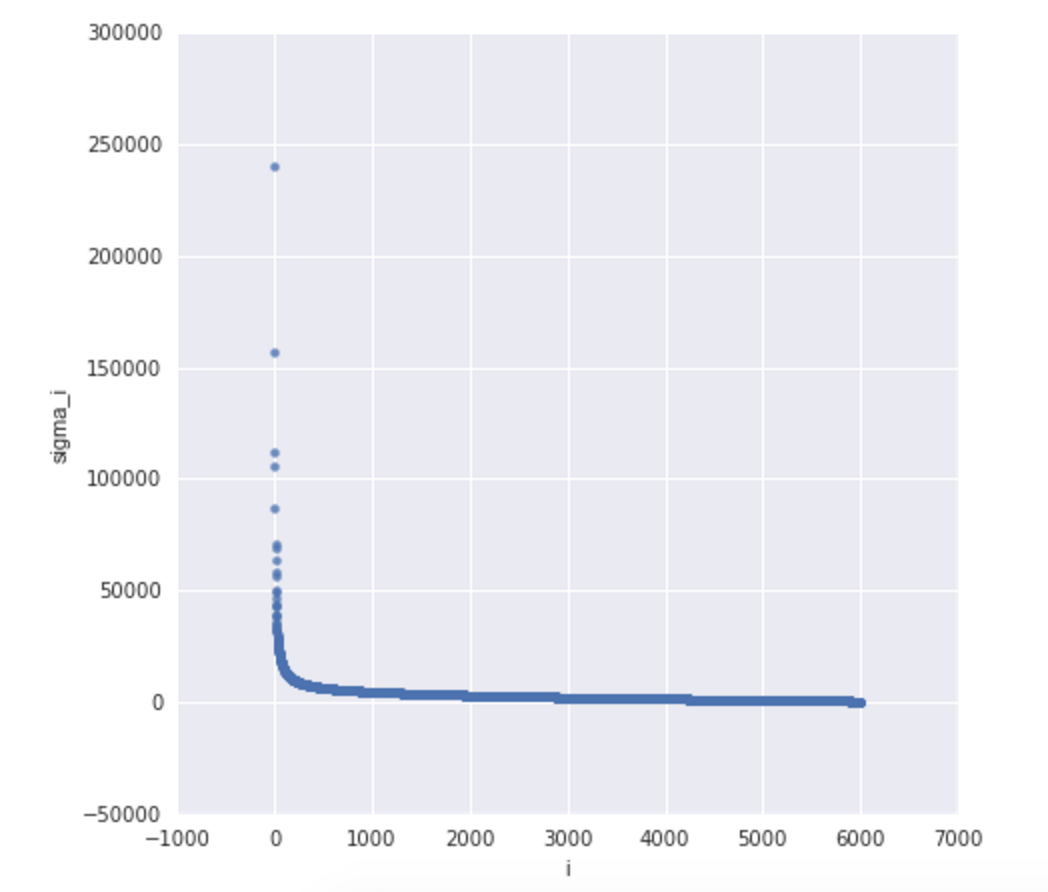

In [38]:
Image(filename='embed_pictures/sigma-svd.PNG', width=250)

* When using Euclidean distance
$$accuracy = \frac{Tr(cm)}{\sum\sum{cm}} = 0.4278$$


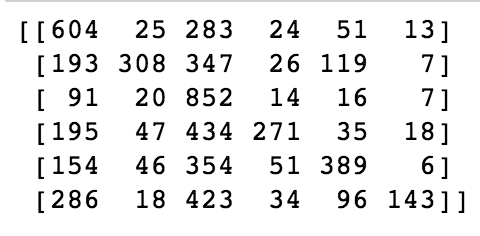

In [29]:
# Confusion Matrix
Image(filename='embed_pictures/cm-svd-eu.PNG', width=250)

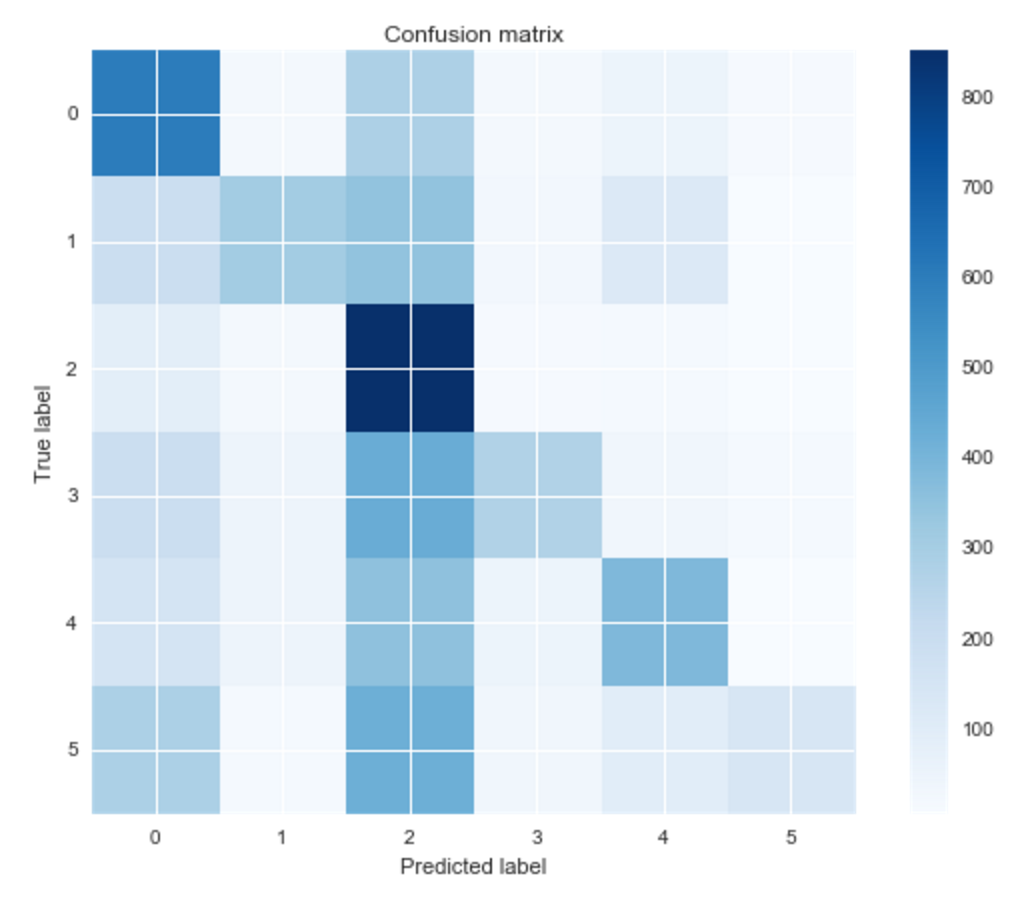

In [30]:
# Visualize Confusion Matrix
Image(filename='embed_pictures/vis-svd-eu.PNG', width=250)

Notice the performance of SVD is not as good as autoencoder even for the same reduced size and they both applied on gray scale images. It might be that SVD only captures those pixel points with larger variance in gray scale, so it failed to capture pattern that constructed with a patch of pixels instead of single pixels. However autoencoder is able to learn those latent patch features by updating the weights by backpropagation through iterations. 

# Histogram
As instructed, we use two types of histograms to encode the images. As for RGB, I just use Image from PIL and call the converter .histogram(). For HSV, things get a little complicated, I use 'cv2.cvtColor(image, cv2.COLOR_BGR2HSV)' to transform the image and then use 'cv2.calcHist' to calculate the HSV histograms one by one and then concatenate them in a row vector.

Histograms encodes the frequency of each point on RGB (Red, Green, Blue) or HSV (Hue, Saturation, Value) spectrum. It is a good idea to use color distribution to represent an color image, for example, in animal category you are expected to see many fluffy animals so colors like yellow, brown are expected to be high, and also considering animal usual are pictured on grass or in forest, you are also expected to see a lot of green. The above description is just a very simple example to show the idea and it is not necessarily correct for general. 

* RGB
    * When using Euclidean distance
$$accuracy = \frac{Tr(cm)}{\sum\sum{cm}} = 0.5567$$

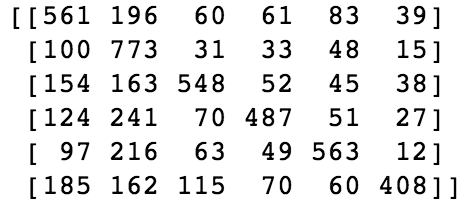

In [26]:
# Confusion Matrix
Image(filename='embed_pictures/RGB-eu.PNG', width=250)

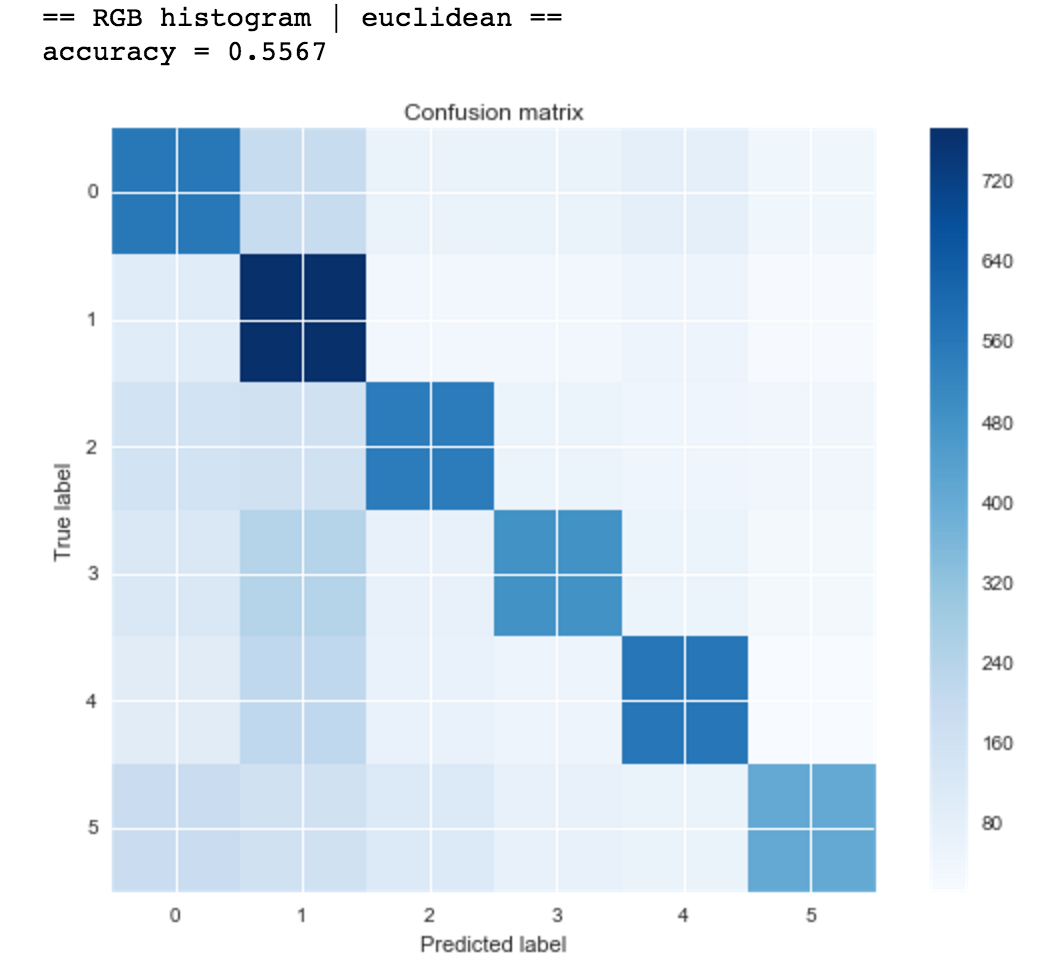

In [31]:
# Visualize Confusion Matrix
Image(filename='embed_pictures/vis-RGB-eu.PNG', width=250)

* HSV
    * When using Euclidean distance
$$accuracy = \frac{Tr(cm)}{\sum\sum{cm}} = 0.5913$$

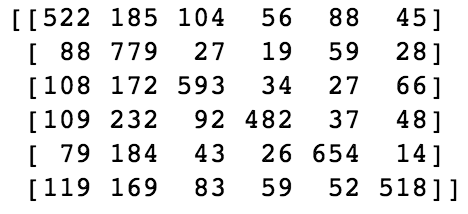

In [32]:
# Confusion Matrix
Image(filename='embed_pictures/HSV-eu.PNG', width=250)

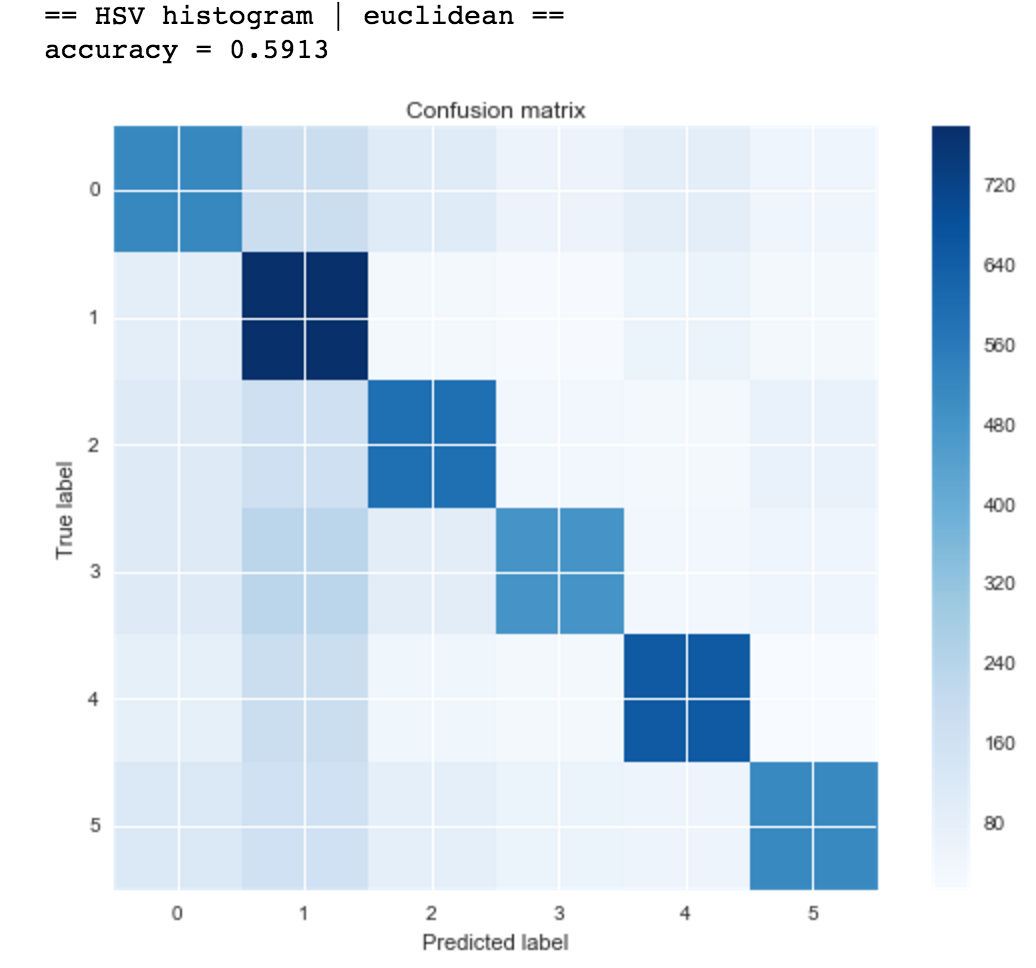

In [33]:
# Visualize Confusion Matrix
Image(filename='embed_pictures/vis-HSV-eu.PNG', width=250)

We can find that when using **Euclidean distance**, accuracy wise, KNN performs similarly between RGB-hist and HSV-hist. 

However, space-wise I would argue HSV-hist might be better than RGB-hist because it has both higher accuracy (0.5913) and smaller size ($X \in R^{6000 \times 480}$) compared to RGB-hist (0.5567, $X \in R^{6000 \times 768}$).

We also notice that histogram performs much better than the previous autoencoder and SVD. The reason might be two folds. First, which I think is more important, is that the autoencoder and SVD 'throw' many information about the picture, such as color, and truncated imformation. Second, there might be the case that color distribution is a better feature to distinguish categories than imformative pixel points and pixel patches.

# Recommender System

Since the goal the recommender system is also to learn the labels of images with a low dimension representation, we introduce 1000 users' preference for images according to the distributions in instruction. Notice this user-image matrix is a sparse matrix, we use SVD and project the eigenvalues on new orthonormal bases to enforce density. 

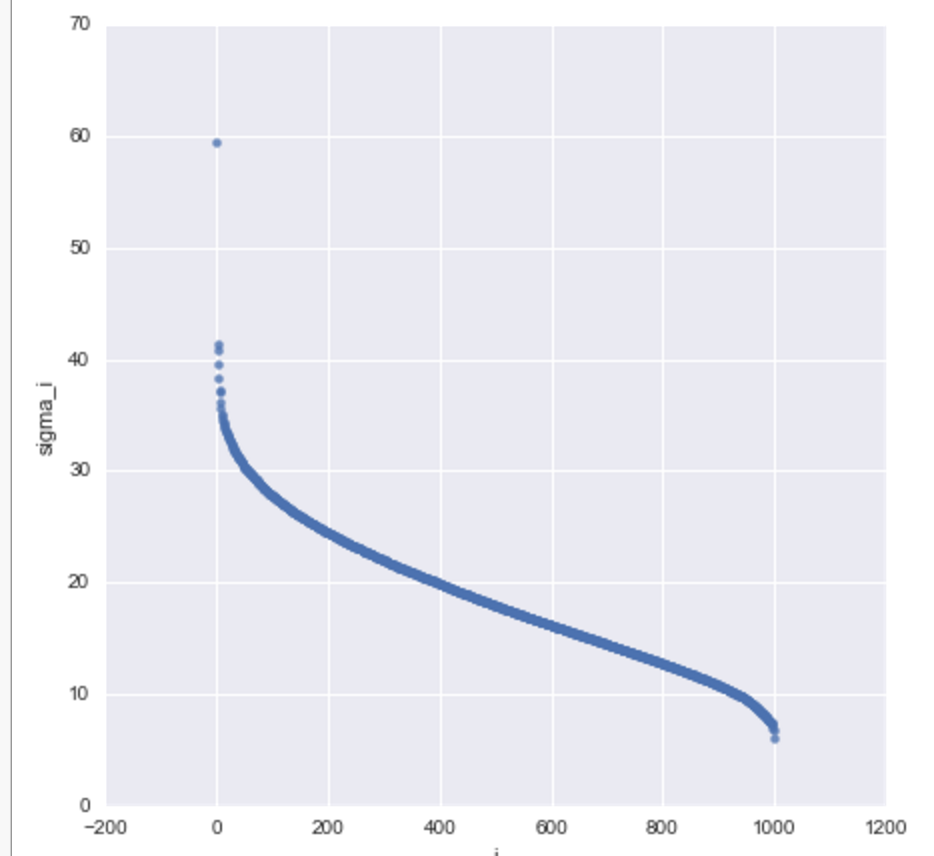

In [34]:
Image(filename='embed_pictures/sigma-rec.PNG', width=250)

* When using Euclidean distance
$$accuracy = \frac{Tr(cm)}{\sum\sum{cm}} = 0.7190$$

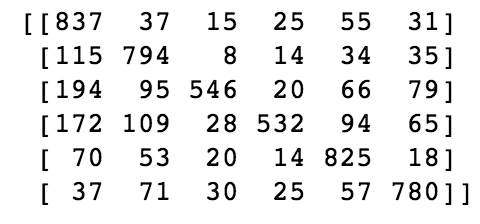

In [35]:
# Confusion Matrix
Image(filename='embed_pictures/rec-eu.PNG', width=250)

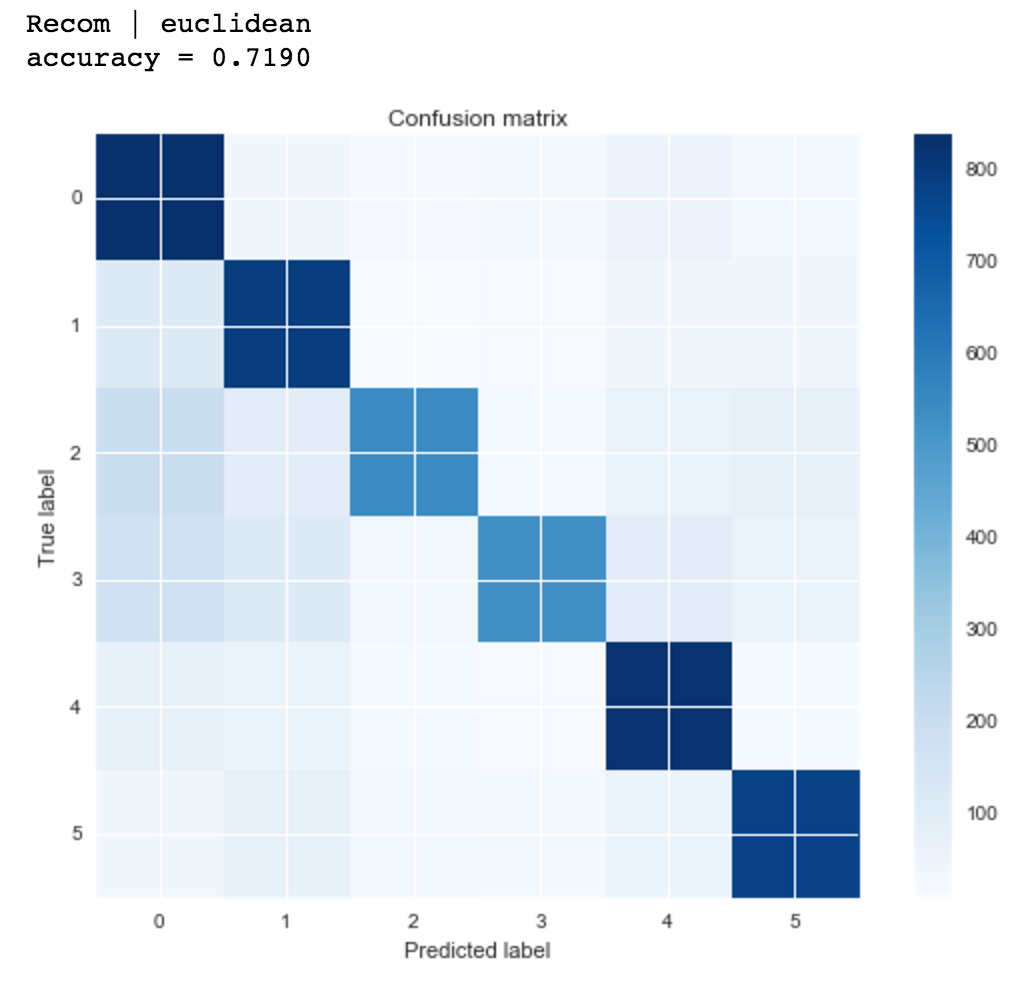

In [37]:
# Visualize Confusion Matrix
Image(filename='embed_pictures/vis-rec-eu.PNG', width=250)

The recommender system works the best even though we did not use any information from the image pixels and patterns. This indicates that if we believe users will have different preference for different categories and if that pattern can be captured, it will be a powerful tool to use a low cost computation to categorize images. This might be useful for some image sharing websites, and the recommender system can be use to refine the classification performance.